# 단순선형회귀

## #01. 패키지 설치

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 모델을 구성하기 위한 객체
from tensorflow.keras.models import Sequential

# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense

## #02. 데이터 셋 준비

In [2]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


## #03. 데이터 전처리

### 결측치 확인

In [3]:
origin.isna().sum()

speed    0
dist     0
dtype: int64

## #04. 탐색적 데이터 분석

### 기본통계확인

In [4]:
origin.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


### 산점도 그래프와 추세선 확인

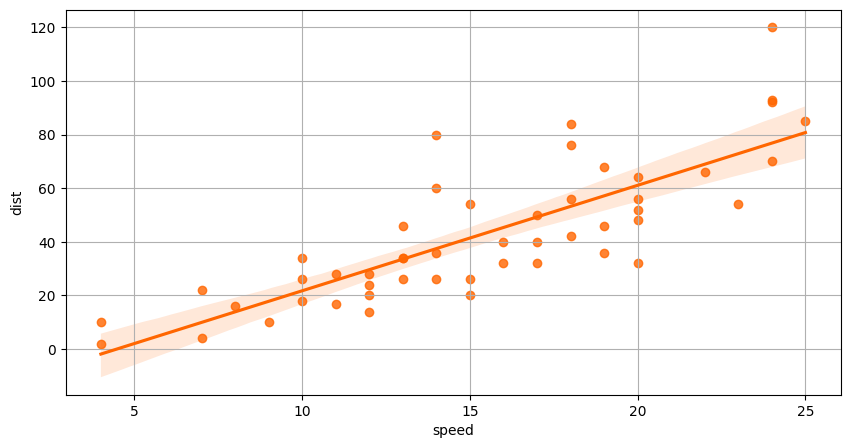

In [5]:
plt.figure(figsize=(10,5))
sb.regplot(data=origin, x='speed', y='dist', color='#ff6600')
plt.grid()
plt.show()
plt.close()

> 추세선을 보고 선형을 띈다면 다항식 X = degree 결정 <br> 곡선보다는 선형 분포에 더 가까우므로 단순선형회귀모델을 적용하기로 함

## #05. 데이터 분할

### 1. 랜덤시드 고정

In [6]:
np.random.seed(777)

### 2. 훈련데이터(독립변수)와 레이블(종속변수) 구분하기

In [7]:
x = origin.drop(['dist'], axis=1)
y = origin['dist']
print("훈련데이터크기:", x.shape, '/레이블크기:', y.shape)

훈련데이터크기: (50, 1) /레이블크기: (50,)


### 3. 훈련데이터와 검증데이터 분할

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=777)
print("훈련용 데이터셋 크기 : %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기 : 35, 검증용 데이터셋 크기: 15


## #06. 모델 개발

### 1. 모델정의

In [11]:
#객체 만들기
model = Sequential() 

#1 차원의 데이터를 입력받고, 32개의 출력을 가지는 "첫번째 Dense층"
# input_shape = 독립변수의 갯수
model.add(Dense(32, activation='relu', input_shape=(1, )))
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함
# "마지막 Dense층"만 제시 ; model.add(Dense(1, activation='linear')) 하면 중간층은 알아서 해줌
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                64        
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2. 학습하기

In [12]:
result = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/300
2/2 [==============================] - 1s 130ms/step - loss: 2338.7388 - mae: 40.9527 - val_loss: 1615.8214 - val_mae: 34.5568
Epoch 2/300
2/2 [==============================] - 0s 30ms/step - loss: 2317.7400 - mae: 40.7317 - val_loss: 1600.5754 - val_mae: 34.3608
Epoch 3/300
2/2 [==============================] - 0s 32ms/step - loss: 2296.5837 - mae: 40.5098 - val_loss: 1585.1133 - val_mae: 34.1609
Epoch 4/300
2/2 [==============================] - 0s 31ms/step - loss: 2275.4778 - mae: 40.2875 - val_loss: 1569.4252 - val_mae: 33.9569
Epoch 5/300
2/2 [==============================] - 0s 30ms/step - loss: 2254.7888 - mae: 40.0610 - val_loss: 1553.9602 - val_mae: 33.7546
Epoch 6/300
2/2 [==============================] - 0s 33ms/step - loss: 2233.5613 - mae: 39.8351 - val_loss: 1538.8054 - val_mae: 33.5553
Epoch 7/300
2/2 [==============================] - 0s 33ms/step - loss: 2212.8428 - mae: 39.6130 - val_loss: 1523.8375 - val_mae: 33.3574
Epoch 8/300
2/2 [================

,loss,mae,val_loss,val_mae
epochs,,,,
1,2338.738770,40.952724,1615.821411,34.556770
2,2317.739990,40.731674,1600.575439,34.360767
3,2296.583740,40.509785,1585.113281,34.160866
4,2275.477783,40.287544,1569.425171,33.956871
5,2254.788818,40.061020,1553.960205,33.754601
...,...,...,...,...
296,271.997894,13.055638,252.117020,13.167767
297,272.198730,13.040311,251.874054,13.151611
298,271.950348,13.031131,252.006271,13.160771


## #07. 학습결과 평가

### 1. 학습결과 시각화

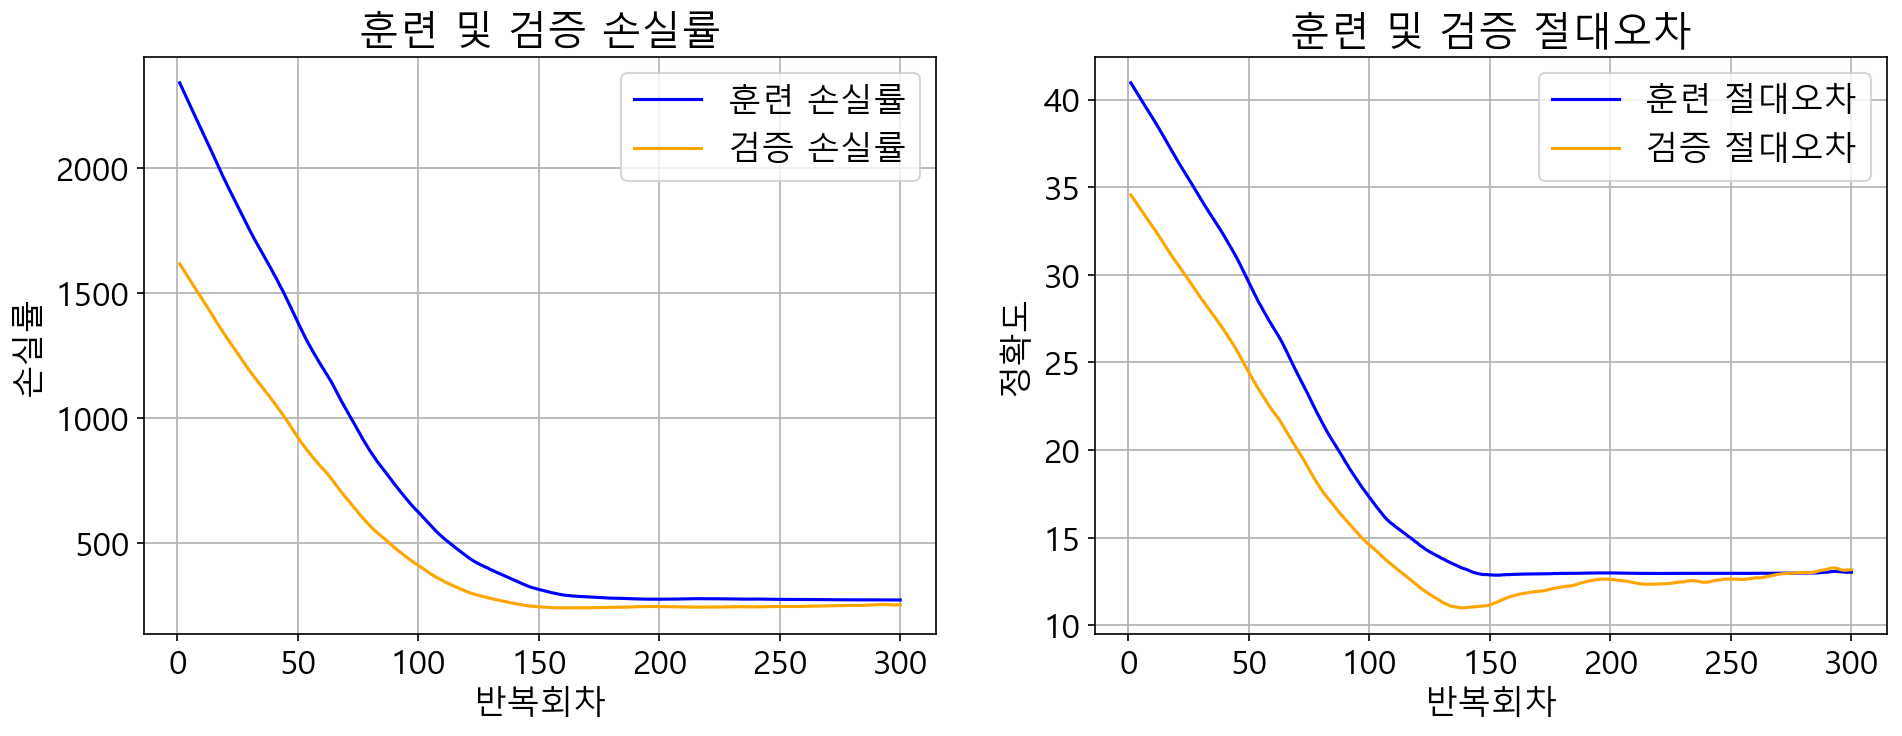

In [13]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# -----------------------------------------
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
#-------------------------------------------
sb.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sb.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기
#-------------------------------------------
sb.lineplot(x=result_df.index, y='mae', data=result_df, color='blue', label='훈련 절대오차', ax=ax2)
sb.lineplot(x=result_df.index, y='val_mae', data=result_df, color='orange', label='검증 절대오차', ax=ax2)
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()


> 과적합 : 훈련손실률과 검증손실률의 데이터를 시각화할때 점점 차이가 나는 경우 -> 데이터를 더 많이 추가하던던가 , 표준화 시키기

### 2. 모델 성능 평가

In [14]:
evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 절대오차: %f" % (evaluate2[0], evaluate2[1]))

2/2 [==============================] - 0s 3ms/step - loss: 271.9137 - mae: 13.0464
최종 훈련 손실률: 271.913666, 최종 훈련 절대오차: 13.046371
1/1 [==============================] - 0s 22ms/step - loss: 252.4816 - mae: 13.1929
최종 검증 손실률: 252.481552, 최종 검증 절대오차: 13.192918


## #08. 학습결과 적용

### 1. 테스트 데이터에 대한 예측 결과 산정

In [15]:
results = model.predict(x_test)
print(results)

1/1 [==============================] - 0s 71ms/step
[[67.67822 ]
 [38.954334]
 [36.081944]
 [33.209553]
 [56.188663]
 [41.826725]
 [41.826725]
 [53.316273]
 [36.081944]
 [56.188663]
 [41.826725]
 [59.06105 ]
 [21.720001]
 [38.954334]
 [13.102837]]


### 2. 결과 데이터 셋 구성

In [16]:
kdf = DataFrame({
    '검증데이터': x_test['speed'],
    '실제값': y_test, 
    '예측값': results.flatten()
})

# 예측오차 = 잔차
kdf['예측오차'] = kdf['실제값'] - kdf['예측값']

kdf

,검증데이터,실제값,예측값,예측오차
44,23,54,67.678223,-13.678223
17,13,34,38.954334,-4.954334
11,12,14,36.081944,-22.081944
9,11,17,33.209553,-16.209553
36,19,46,56.188663,-10.188663
21,14,60,41.826725,18.173275
22,14,80,41.826725,38.173275
31,18,42,53.316273,-11.316273
12,12,20,36.081944,-16.081944
37,19,68,56.188663,11.811337


### 3. 실제 결과값과 머신러닝에 의한 예측값 비교

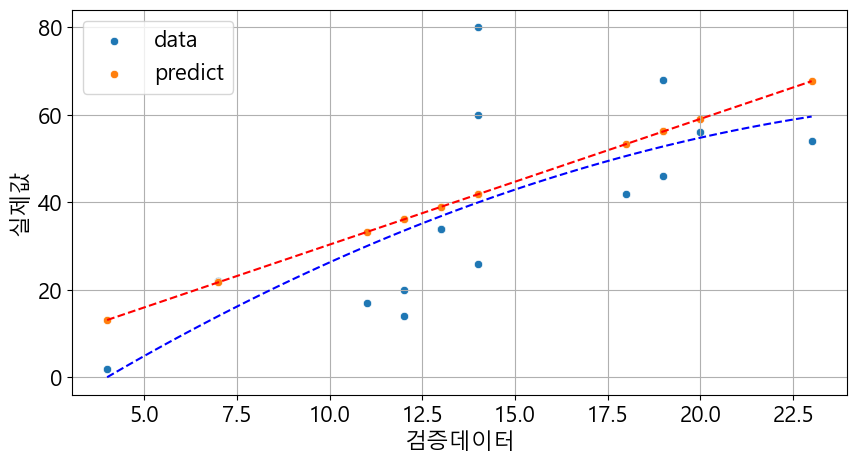

In [17]:
helper.regplot(x_left=kdf['검증데이터'], y_left=kdf['실제값'], y_left_pred=kdf['예측값'])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))


### 4. 임의의 값에 대한 머신러닝 예측 결과

In [18]:
my_speed = 50

results = model.predict([[my_speed]])
print("속도가 %d인 자동차의 제동거리는 %d로 예상됩니다." % (my_speed, results))

1/1 [==============================] - 0s 68ms/step
속도가 50인 자동차의 제동거리는 145로 예상됩니다.
